<a href="https://colab.research.google.com/github/Firojpaudel/DALL-E_type_model_build/blob/main/Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a Dall-e type model

---

In [ ]:
## pip installs
! pip install datasets transformers torch torchvision

#### 1. Downloading the dataset (HF)

---

In [ ]:
## Download the dataset as a whole
from datasets import load_dataset

dataset_name = "HuggingFaceM4/COCO"

dataset = load_dataset(dataset_name, trust_remote_code=True)

In [3]:
fraction= 0.1

small_train = dataset["train"].shuffle(seed=42).select(range(int(len(dataset["train"]) * fraction)))
small_test = dataset["test"].shuffle(seed=42).select(range(int(len(dataset["test"]) * fraction)))
small_validation = dataset["validation"].shuffle(seed=42).select(range(int(len(dataset["validation"]) * fraction)))

print(f"Small dataset train size: {len(small_train)}")
print(f"Small dataset test size: {len(small_test)}")
print(f"Small dataset validation size: {len(small_validation)}")

Small dataset train size: 56674
Small dataset test size: 2501
Small dataset validation size: 2501


In [ ]:
##@ Saving them...
small_train.save_to_disk("small_train")
small_test.save_to_disk("small_test")
small_validation.save_to_disk("small_validation")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!zip -r /content/small_train.zip /content/small_train

  adding: content/small_train/ (stored 0%)
  adding: content/small_train/data-00016-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00001-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00004-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00009-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00013-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00014-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00008-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00017-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00012-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00015-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00010-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00000-of-00019.arrow (deflated 1%)
  adding: content/small_train/data-00011-of-00019.arrow (deflated 1%)
  adding: content/small_train/state.json (defla

In [9]:
!cp small_train.zip /content/drive/MyDrive/

In [13]:
!rm -rf /content/small_train

In [15]:
!zip -r /content/small_test.zip /content/small_test

  adding: content/small_test/ (stored 0%)
  adding: content/small_test/state.json (deflated 38%)
  adding: content/small_test/dataset_info.json (deflated 64%)
  adding: content/small_test/data-00000-of-00001.arrow (deflated 1%)


In [16]:
!rm -rf /content/small_test

In [11]:
!zip -r /content/small_validation.zip /content/small_validation

  adding: content/small_validation/ (stored 0%)
  adding: content/small_validation/state.json (deflated 38%)
  adding: content/small_validation/dataset_info.json (deflated 64%)
  adding: content/small_validation/data-00000-of-00001.arrow (deflated 1%)


In [14]:
!rm -rf /content/small_validation

Finally, downloaded all the train, test and validaiton zip files *(removing since I have limited space in my colab space)*

Now I can load directly the dataset this way

---

#### 2. Getting to know the data

---

The dataset that I have uploaded is the standard hugging face dataset with `.arrow` and `.json` files. I'll be using `load_from_disk` to load from the input data.

In [1]:
from datasets import load_from_disk

ds_path = '/kaggle/input/huggingfacem4coco-10with-splits/small_train/content/small_train'

## Loading
ds = load_from_disk(ds_path)

print(ds)

Loading dataset from disk:   0%|          | 0/19 [00:00<?, ?it/s]

Dataset({
    features: ['image', 'filepath', 'sentids', 'filename', 'imgid', 'split', 'sentences', 'cocoid'],
    num_rows: 56674
})


In [2]:
ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x491>,
 'filepath': 'COCO_train2014_000000147094.jpg',
 'sentids': [112114, 115237, 116227, 117655, 141142],
 'filename': 'COCO_train2014_000000147094.jpg',
 'imgid': 45848,
 'split': 'train',
 'sentences': {'tokens': ['this',
   'an',
   'image',
   'of',
   'a',
   'bird',
   'on',
   'a',
   'car',
   'mirror'],
  'raw': 'This an image of a bird on a car mirror',
  'imgid': 45848,
  'sentid': 117655},
 'cocoid': 147094}

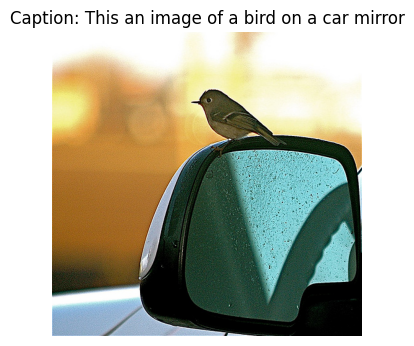

In [3]:
## Inspecting an image

import matplotlib.pyplot as plt 
from PIL import Image 


sample_img= ds[0]['image']

plt.figure(figsize=(4,4))
plt.imshow(sample_img)
plt.axis('off')
plt.title(f"Caption: {ds[0]['sentences']['raw']}")
plt.show()

#### 3. Standardizing the image file sizes

---

I've implemented this part locally in a separate notebook file. Link to the notebook: [Click here](Preprocess/preprocess.ipynb)

In [7]:
# Loading and inspecting
from datasets import load_from_disk

ds_pre = load_from_disk('Preprocess/Preprocessed_ds/Preprocessed_ds')

ds_pre

Dataset({
    features: ['image', 'filepath', 'sentids', 'filename', 'imgid', 'split', 'sentences', 'cocoid'],
    num_rows: 56674
})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179039478302..2.640000104904175].


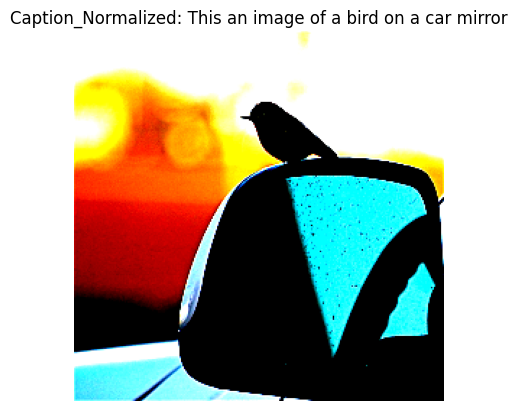

In [8]:
import matplotlib.pyplot as plt
import numpy as np


img = ds_pre[0]['image']


img = np.array(img)

# Ensure the dimensions are [Height, Width, Channels] **(matplotlib format)**
if img.shape[0] == 3:  # If its in [Channels, Height, Width] format
    img = np.transpose(img, (1, 2, 0))

# Convert to uint8 if necessary
if img.max() <= 1.0:
    img = (img * 255).astype(np.uint8)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title(f"Caption_Normalized: {ds_pre[0]['sentences']['raw']}")
plt.show()

Hence, the converted dataset is infact working!!

In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

vocab_size = len(tokenizer)

class PreprocessedDataset(Dataset):
    def __init__(self, dataset, tokenizer, max_length=16):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = self.dataset[idx]['image']
        caption = self.dataset[idx]['sentences']['raw']
        
        # Tokenize and pad the caption
        tokenized_caption = self.tokenizer(
            caption, 
            padding='max_length', 
            truncation=True, 
            max_length=self.max_length,
            return_tensors='pt'
        )

        image = torch.tensor(image)
        
        return image, tokenized_caption.input_ids.squeeze(0) 

In [ ]:
preprocessed_dataset = PreprocessedDataset(ds_pre, tokenizer, max_length=16)
dataloader = DataLoader(preprocessed_dataset, batch_size=16, shuffle=True, num_workers=8, pin_memory=True, prefetch_factor=2, persistent_workers=True)

for batch_idx, (images, tokenized_captions) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}")
    print(f"Images batch shape: {images.shape}")
    print(f"Tokenized caption example: {tokenized_captions[0]}")
    
    if batch_idx >= 2: 
        break

#### cDC-GAN implementation

---

In [8]:
import torch
import torch.nn as nn 
import torch.optim as optim 

In [9]:
# Define the Generator for Conditional DCGAN
class Generator(nn.Module):
    def __init__(self, z_dim, embed_dim, img_channels):
        super(Generator, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim)
        self.fc1 = nn.Linear(z_dim + embed_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, img_channels * 256 * 256)
        self.reshaper = nn.Unflatten(1, (img_channels, 256, 256))

    def forward(self, z, captions):
        caption_embeds = self.embedding(captions)
        x = torch.cat([z, caption_embeds], dim=1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return self.reshaper(x)


# Define the Discriminator for Conditional DCGAN
class Discriminator(nn.Module):
    def __init__(self, embed_dim, img_channels):
        super(Discriminator, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim)
        self.conv1 = nn.Conv2d(img_channels, 64, 4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 4, stride=2, padding=1)
        self.fc1 = nn.Linear(128 * 64 * 64 + embed_dim, 1)

    def forward(self, img, captions):
        caption_embeds = self.embedding(captions)
        x = torch.relu(self.conv1(img))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.cat([x, caption_embeds], dim=1)
        x = self.fc1(x)
        return torch.sigmoid(x)


# Initialize models
z_dim = 100  # Random noise dimension
embed_dim = 512  # Embedding dimension for captions
img_channels = 3  # Assuming RGB images

generator = Generator(z_dim, embed_dim, img_channels)
discriminator = Discriminator(embed_dim, img_channels)

Generated Images Shape: torch.Size([16, 3, 256, 256])
Discriminator Output Shape: torch.Size([16, 1])


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(f"Number of GPUs: {torch.cuda.device_count()}")

Using device: cuda
Number of GPUs: 2


In [11]:
if torch.cuda.device_count() > 1:
    print("Using multiple GPUs for training")
    generator = nn.DataParallel(generator)
    discriminator = nn.DataParallel(discriminator)

Using multiple GPUs for training


In [ ]:
from tqdm import tqdm
from torch.cuda.amp import GradScaler, autocast  # Updated AMP imports

# Move models and criterion to the device
generator = generator.to(device)
discriminator = discriminator.to(device)
criterion = nn.BCEWithLogitsLoss().to(device)  # Replace BCELoss with BCEWithLogitsLoss

# Optimizers
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Gradient scaler for mixed precision training
scaler_g = GradScaler(device='cuda')
scaler_d = GradScaler(device='cuda')

# Training Loop
for epoch in range(50):
    progress_bar = tqdm(dataloader, desc=f"Epoch [{epoch + 1}/50]", leave=False)
    for real_images, captions in progress_bar:
        # Move data to GPU
        real_images = real_images.to(device)
        captions = captions.to(device)
        z = torch.randn(real_images.size(0), z_dim, device=device)  # Latent vector

        # --------------------
        # Step 1: Update Discriminator
        # --------------------
        optimizer_d.zero_grad()
        with autocast(device_type='cuda'):  # Mixed precision for Discriminator
            # Generate fake images
            fake_images = generator(z, captions)

            # Discriminator outputs
            real_output = discriminator(real_images, captions)
            fake_output = discriminator(fake_images.detach(), captions)

            # Loss for discriminator
            loss_d_real = criterion(real_output, torch.ones_like(real_output, device=device))  # Real labels
            loss_d_fake = criterion(fake_output, torch.zeros_like(fake_output, device=device))  # Fake labels
            loss_d = (loss_d_real + loss_d_fake) / 2  # Average loss

        scaler_d.scale(loss_d).backward()  # Scaled gradients for D
        scaler_d.step(optimizer_d)
        scaler_d.update()

        # --------------------
        # Step 2: Update Generator
        # --------------------
        optimizer_g.zero_grad()
        with autocast(device_type='cuda'):  # Mixed precision for Generator
            fake_output = discriminator(fake_images, captions)  # Pass fake images through D
            loss_g = criterion(fake_output, torch.ones_like(fake_output, device=device))  # Generator wants D to output real labels

        scaler_g.scale(loss_g).backward()  # Scaled gradients for G
        scaler_g.step(optimizer_g)
        scaler_g.update()

        # Update progress bar
        progress_bar.set_postfix(loss_d=loss_d.item(), loss_g=loss_g.item())

    print(f"Epoch [{epoch + 1}/50], Loss D: {loss_d.item():.4f}, Loss G: {loss_g.item():.4f}")


Epoch [1/50]:  22%|██▏       | 782/3543 [24:02<51:39,  1.12s/it, loss_d=0.503, loss_g=0.693]  